
# CitiBike Data Analysis with Seaborn (January 2022)

This notebook analyzes CitiBike usage patterns using January 2022 data, focusing on:
- Most popular starting stations
- Daily ride patterns and durations
- Comparison between member types
- Hourly usage patterns


In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for all plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl", 20)  # Setting palette with 20 colors for the bar chart


In [2]:

# Load and prepare the data
df = pd.read_csv('202201-citibike-tripdata_1.csv')

# Convert datetime columns
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Create date columns for analysis
df['date'] = df['started_at'].dt.date
df['month'] = df['started_at'].dt.month
df['hour'] = df['started_at'].dt.hour

# Calculate ride duration
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Preview the data
df.head()


/tmp/ipykernel_208/3420983303.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('202201-citibike-tripdata_1.csv')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,hour,ride_duration
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,1,13,8.801183
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1,11,10.821000
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,1,10,13.868850
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1,8,35.037133
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,1,14,20.573850


## Top 20 Starting Stations

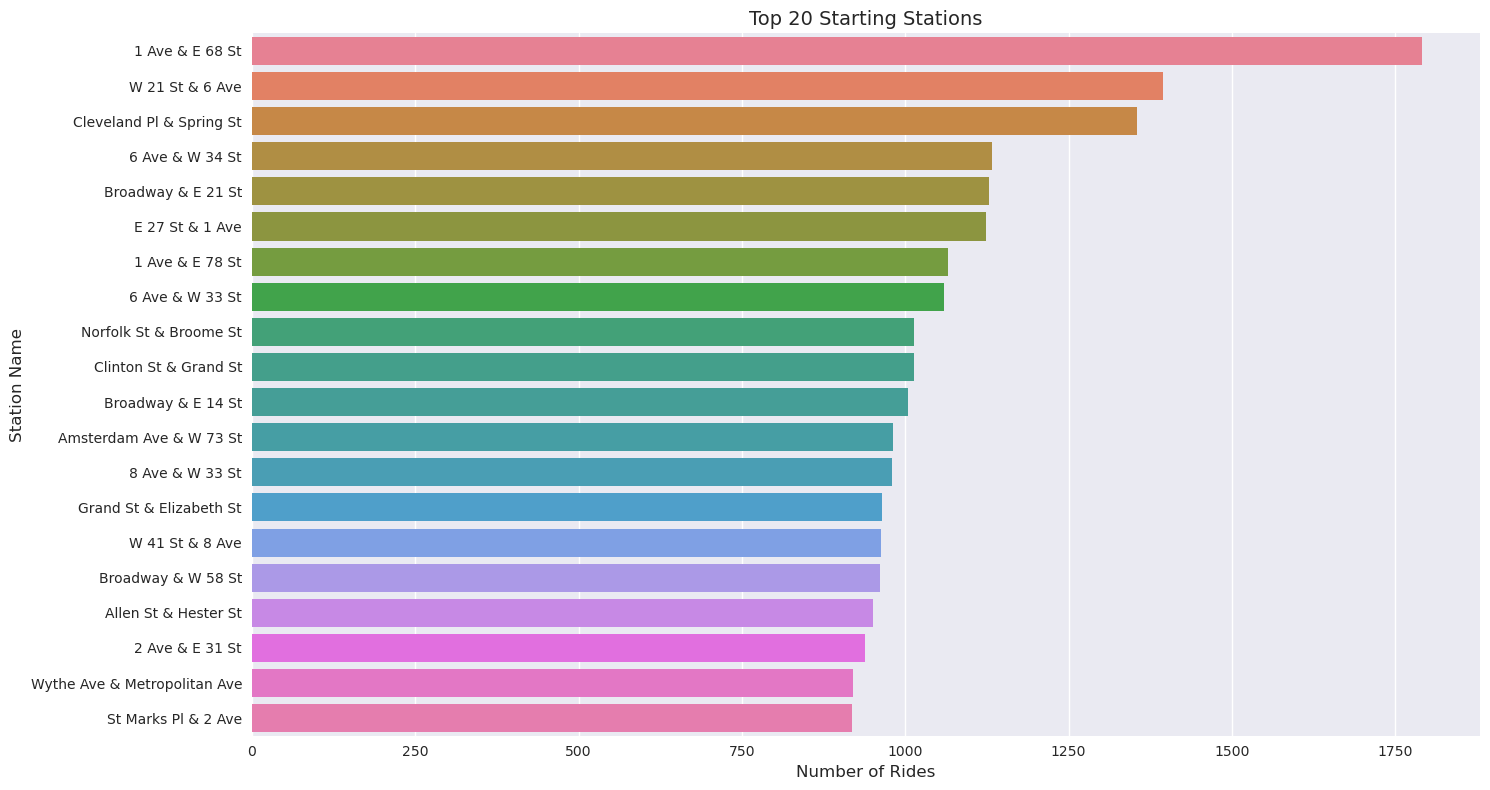

In [3]:

plt.figure(figsize=(15, 8))
station_counts = df['start_station_name'].value_counts().head(20)
sns.barplot(x=station_counts.values, y=station_counts.index, palette='husl')
plt.title('Top 20 Starting Stations', fontsize=14)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Station Name', fontsize=12)
plt.tight_layout()
plt.show()


## Daily Rides and Average Duration

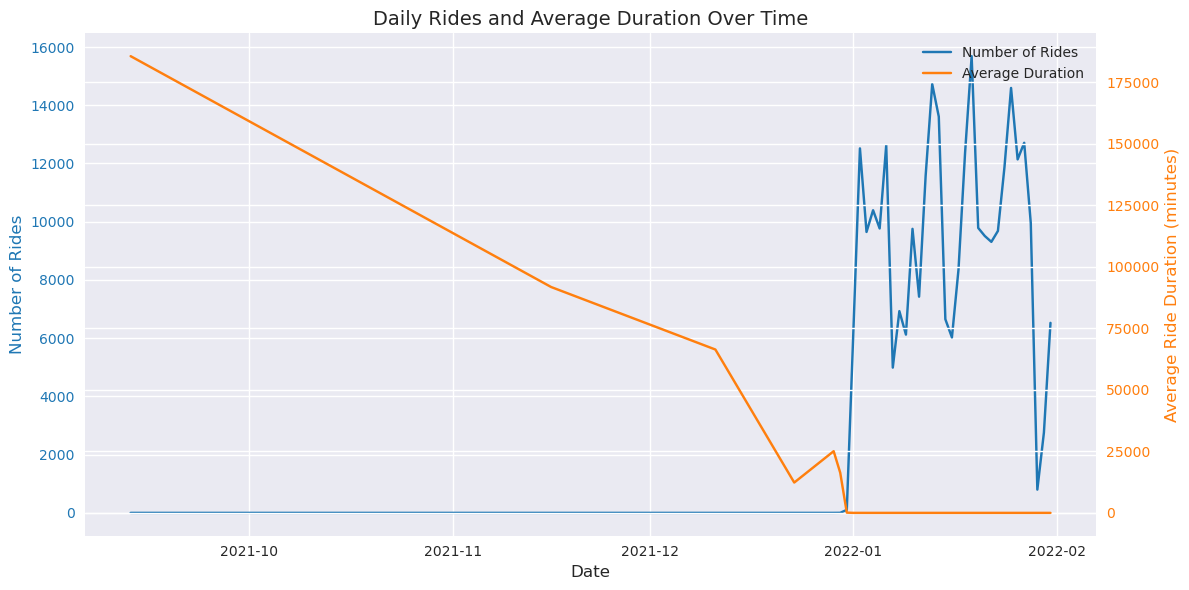

In [4]:

# Calculate daily metrics
daily_rides = df.groupby('date').size().reset_index(name='rides')
daily_rides['date'] = pd.to_datetime(daily_rides['date'])
daily_duration = df.groupby('date')['ride_duration'].mean().reset_index()
daily_duration['date'] = pd.to_datetime(daily_duration['date'])

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot number of rides
color1 = '#1f77b4'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Number of Rides', color=color1, fontsize=12)
line1 = ax1.plot(daily_rides['date'], daily_rides['rides'], color=color1, label='Number of Rides')
ax1.tick_params(axis='y', labelcolor=color1)

# Create second y-axis
ax2 = ax1.twinx()
color2 = '#ff7f0e'
ax2.set_ylabel('Average Ride Duration (minutes)', color=color2, fontsize=12)
line2 = ax2.plot(daily_duration['date'], daily_duration['ride_duration'], color=color2, label='Average Duration')
ax2.tick_params(axis='y', labelcolor=color2)

# Add legend
lines1 = line1 + line2
labels = [l.get_label() for l in lines1]
ax1.legend(lines1, labels, loc='upper right')

plt.title('Daily Rides and Average Duration Over Time', fontsize=14)
plt.tight_layout()
plt.show()


## Ride Duration by Member Type

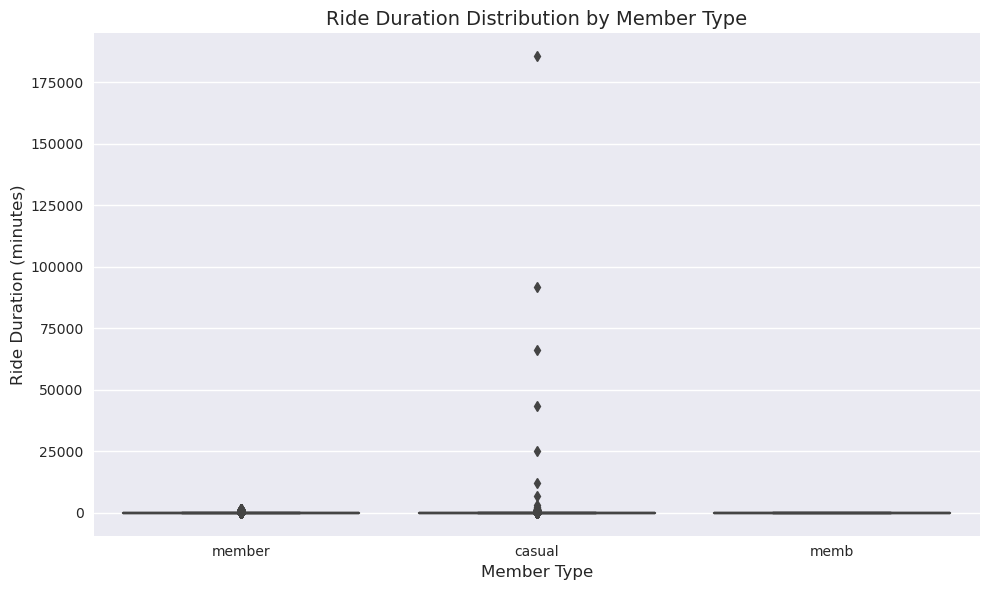

In [5]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='member_casual', y='ride_duration', data=df, palette='husl')
plt.title('Ride Duration Distribution by Member Type', fontsize=14)
plt.xlabel('Member Type', fontsize=12)
plt.ylabel('Ride Duration (minutes)', fontsize=12)
plt.tight_layout()
plt.show()


## Hourly Ride Patterns by Member Type

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


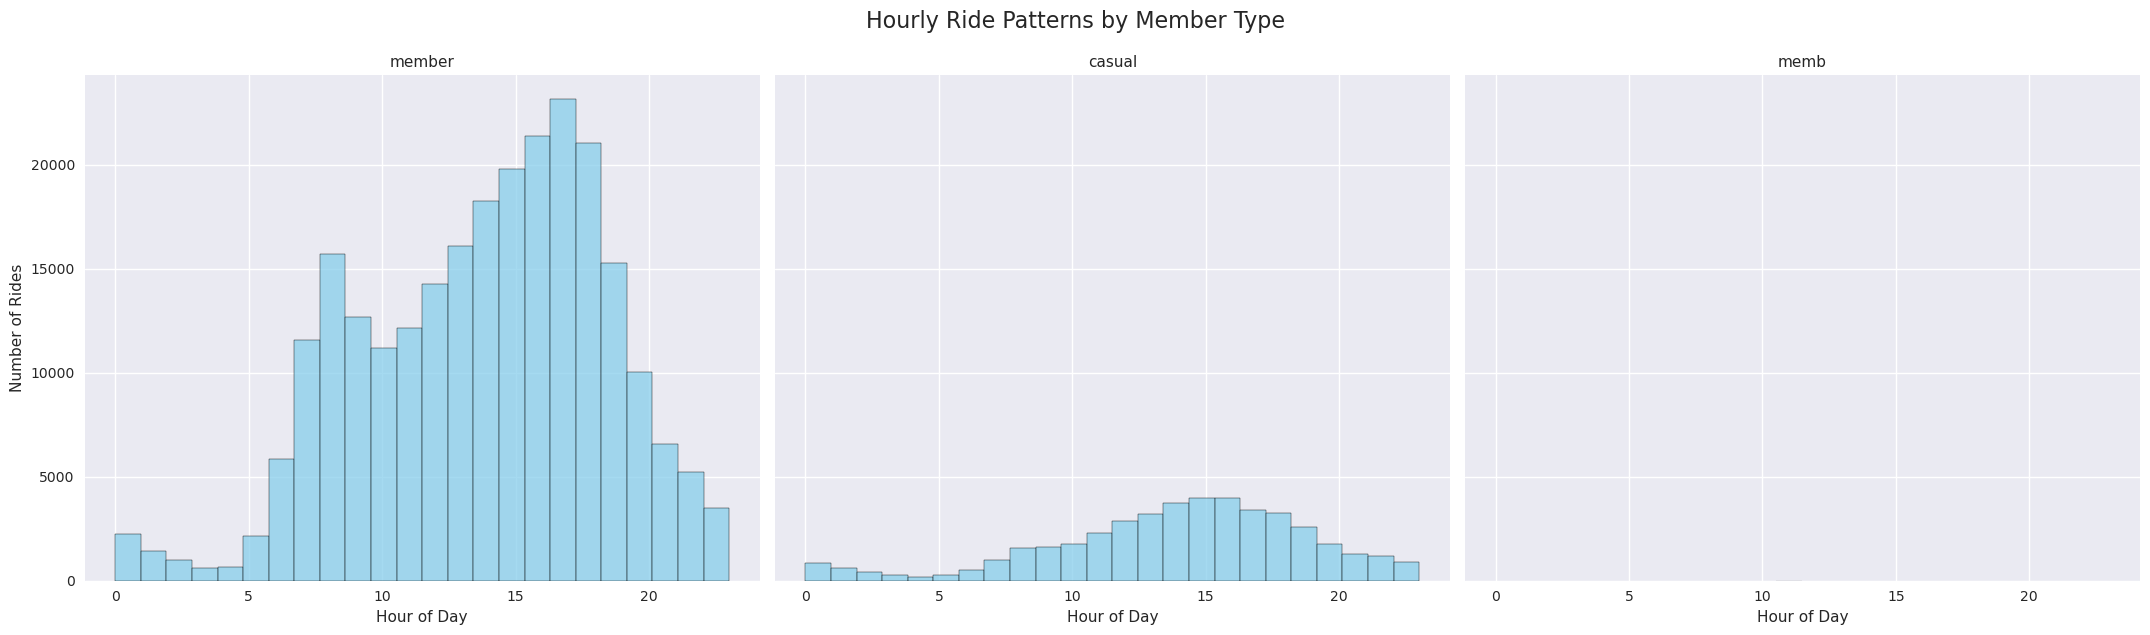

In [6]:

g = sns.FacetGrid(df, col='member_casual', height=6, aspect=1.2)
g.map(sns.histplot, 'hour', bins=24, kde=False, color='skyblue')
g.set_axis_labels('Hour of Day', 'Number of Rides')
g.set_titles('{col_name}')
g.fig.suptitle('Hourly Ride Patterns by Member Type', y=1.05, fontsize=16)
plt.show()



## Analysis Summary

1. **Station Popularity**:
   - The bar chart shows which stations are most frequently used as starting points
   - This information is valuable for bike reallocation and maintenance planning

2. **Daily Patterns**:
   - The dual-axis plot reveals both the volume of rides and their average duration
   - We can see how these metrics vary throughout the month

3. **Member vs Casual Users**:
   - The box plot shows that casual users tend to take longer rides
   - There's more variability in ride duration among casual users
   - Members show more consistent ride durations

4. **Hourly Patterns**:
   - Members show clear commuting patterns with morning and evening peaks
   - Casual users have a single afternoon peak
   - This suggests different use cases: commuting vs leisure
